## Data Augmentation on Cats vs Dogs

In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import img_to_array, load_img
import os


In [2]:

base_dir = 'dogs-vs-cats'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory:
['sampleSubmission.csv', 'test', 'test1.zip', 'train', 'validation']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [3]:

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [4]:

train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg', 'dog.10001.jpg', 'dog.10002.jpg', 'dog.10003.jpg', 'dog.10004.jpg']


In [5]:

print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))


total training cat images : 12500
total training dog images : 12500
total validation cat images : 500
total validation dog images : 500


In [6]:

def CreateModel():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation= 'relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
        
    ])

    model.compile(
        loss='binary_crossentropy',
        optimizer=RMSprop(learning_rate=1e-4),
        metrics = ['accuracy']
    )  

    return model


In [7]:

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:

EPOCHS = 50

model = CreateModel()

history = model.fit(
      train_generator,
      steps_per_epoch=100, 
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  
      verbose=2
)


Epoch 1/50
100/100 - 57s - loss: 0.6906 - accuracy: 0.5185 - val_loss: 0.6787 - val_accuracy: 0.5610 - 57s/epoch - 569ms/step
Epoch 2/50
100/100 - 53s - loss: 0.6756 - accuracy: 0.5755 - val_loss: 0.6543 - val_accuracy: 0.6370 - 53s/epoch - 533ms/step
Epoch 3/50
100/100 - 53s - loss: 0.6648 - accuracy: 0.5885 - val_loss: 0.6368 - val_accuracy: 0.6610 - 53s/epoch - 532ms/step
Epoch 4/50
100/100 - 53s - loss: 0.6385 - accuracy: 0.6395 - val_loss: 0.6021 - val_accuracy: 0.7040 - 53s/epoch - 527ms/step
Epoch 5/50
100/100 - 53s - loss: 0.6191 - accuracy: 0.6600 - val_loss: 0.5758 - val_accuracy: 0.7070 - 53s/epoch - 529ms/step
Epoch 6/50
100/100 - 53s - loss: 0.5867 - accuracy: 0.6850 - val_loss: 0.6031 - val_accuracy: 0.6350 - 53s/epoch - 534ms/step
Epoch 7/50
100/100 - 52s - loss: 0.5688 - accuracy: 0.7125 - val_loss: 0.5563 - val_accuracy: 0.7050 - 52s/epoch - 521ms/step
Epoch 8/50
100/100 - 51s - loss: 0.5762 - accuracy: 0.6975 - val_loss: 0.5525 - val_accuracy: 0.7230 - 51s/epoch - 509

In [9]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

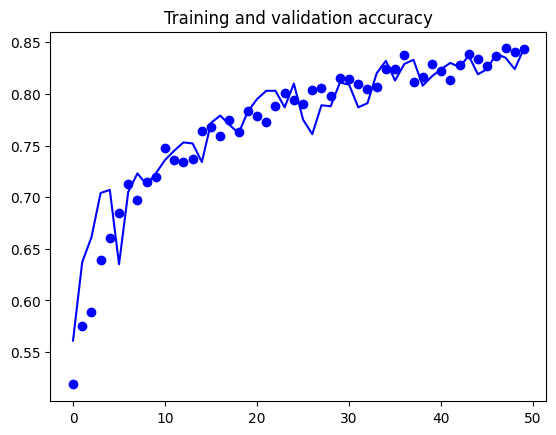

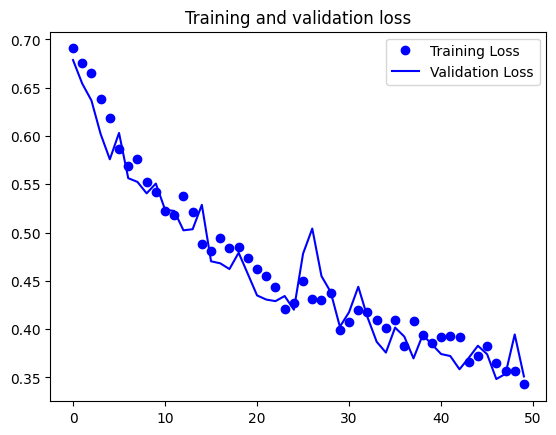

In [10]:

# Plotting the training results
plot_loss_acc(history)


In [11]:

model_for_aug = CreateModel()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),
        batch_size=20, 
        class_mode='binary'
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary'
)

Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2
)

Epoch 1/50
100/100 - 57s - loss: 0.6938 - accuracy: 0.5110 - val_loss: 0.6864 - val_accuracy: 0.5430 - 57s/epoch - 571ms/step
Epoch 2/50
100/100 - 53s - loss: 0.6898 - accuracy: 0.5400 - val_loss: 0.6815 - val_accuracy: 0.5370 - 53s/epoch - 532ms/step
Epoch 3/50
100/100 - 52s - loss: 0.6860 - accuracy: 0.5325 - val_loss: 0.6904 - val_accuracy: 0.5350 - 52s/epoch - 524ms/step
Epoch 4/50
100/100 - 52s - loss: 0.6793 - accuracy: 0.5670 - val_loss: 0.6583 - val_accuracy: 0.6090 - 52s/epoch - 524ms/step
Epoch 5/50
100/100 - 52s - loss: 0.6757 - accuracy: 0.5775 - val_loss: 0.6465 - val_accuracy: 0.6140 - 52s/epoch - 524ms/step
Epoch 6/50
100/100 - 52s - loss: 0.6680 - accuracy: 0.5985 - val_loss: 0.6285 - val_accuracy: 0.6520 - 52s/epoch - 523ms/step
Epoch 7/50
100/100 - 53s - loss: 0.6539 - accuracy: 0.6050 - val_loss: 0.6141 - val_accuracy: 0.6810 - 53s/epoch - 527ms/step
Epoch 8/50
100/100 - 52s - loss: 0.6555 - accuracy: 0.6080 - val_loss: 0.6121 - val_accuracy: 0.6420 - 52s/epoch - 524

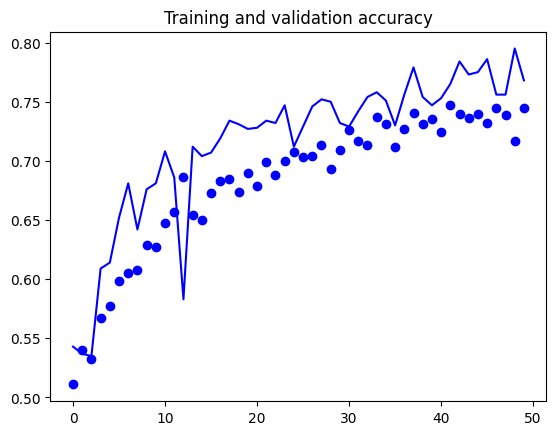

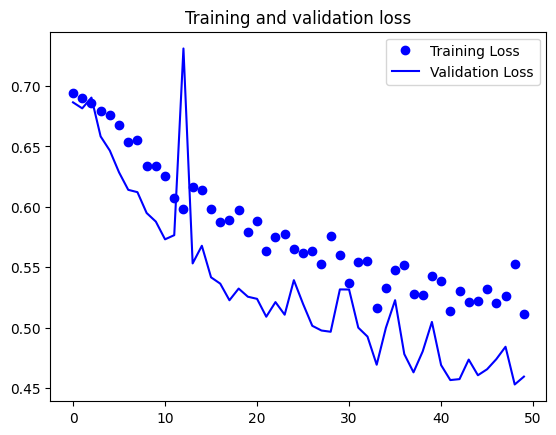

In [13]:

# Plotting the training results
plot_loss_acc(history_with_aug)
